In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fisher linear classification
## We assume the same covariance matrix for both classes (we assume there exist two classes m = {-1, 1})

# First we generate two groups of points in 2D space, with the same covariance matricies (one group is translated by an arbitrary vector)

In [2]:
number_of_points = 64
covariance = np.array([[-1.55, 4], [4, -1.55]])
mean = np.array([1, 1])
translation = np.array([3, 3])

group_adam = np.random.multivariate_normal(mean, covariance, number_of_points)
eve_shift = number_of_points - 0
group_eve = np.random.multivariate_normal(mean + translation, covariance, eve_shift)
adam_group_class = np.array(number_of_points * [1])
eve_group_class = np.array(eve_shift * [-1])

C:\Users\matip\AppData\Local\Temp\ipykernel_18312\1961991384.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  group_adam = np.random.multivariate_normal(mean, covariance, number_of_points)
C:\Users\matip\AppData\Local\Temp\ipykernel_18312\1961991384.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  group_eve = np.random.multivariate_normal(mean + translation, covariance, eve_shift)


# Plot Adam and Eve group

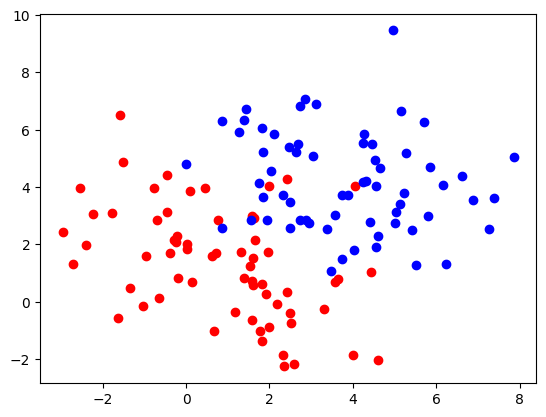

In [3]:
plt.scatter(group_adam[:, 0], group_adam[:, 1], c='r', label='Adam')
plt.scatter(group_eve[:, 0], group_eve[:, 1], c='b', label='Eve')
plt.show()

In [4]:
print('covariance of Adam group')
print(np.cov(group_adam.T))
print('covariance of Eve group')
print(np.cov(group_eve.T))

covariance of Adam group
[[ 3.41141247 -1.63766335]
 [-1.63766335  3.7528746 ]]
covariance of Eve group
[[ 3.18090174 -0.60091343]
 [-0.60091343  2.90172182]]


# Matrix W

In [5]:
def w_matrix(points1, points2):
    len_points1 = len(points1)
    len_points2 = len(points2)
    factor = 1/(len_points1 + len_points2 - 2)
    covariance1 = np.cov(points1.T)
    covariance2 = np.cov(points2.T)
    w_matrix = factor * (covariance1 + covariance2)
    return w_matrix


In [6]:
# adam and eve w matrix
w_matrix_adam_eve = w_matrix(group_adam, group_eve)
print(w_matrix_adam_eve)

[[ 0.05231995 -0.01776648]
 [-0.01776648  0.05281426]]


In [7]:
adam_centroid = np.mean(group_adam, axis=0)
eve_centroid = np.mean(group_eve, axis=0)

In [8]:
print(adam_centroid)
print(eve_centroid)

[0.832722   1.34714906]
[3.79955125 4.1874325 ]


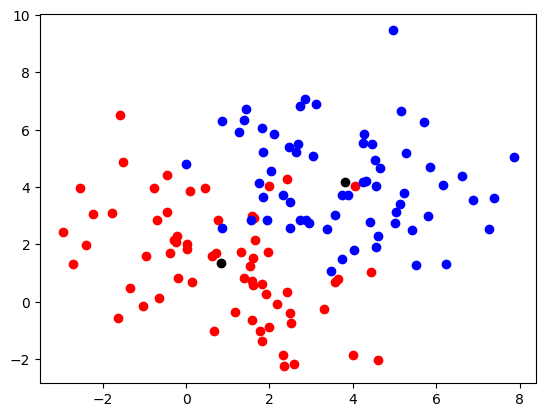

In [9]:
plt.scatter(group_adam[:, 0], group_adam[:, 1], c='r', label='Adam')
plt.scatter(group_eve[:, 0], group_eve[:, 1], c='b', label='Eve')
# centroids
plt.scatter(adam_centroid[0], adam_centroid[1], c='black', label='Adam centroid')
plt.scatter(eve_centroid[0], eve_centroid[1], c='black', label='Eve centroid')
plt.show()

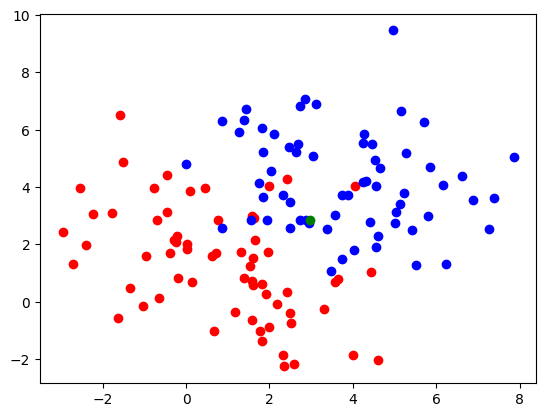

In [10]:
# centroids difference
centroids_difference = eve_centroid - adam_centroid
plt.plot(group_adam[:, 0], group_adam[:, 1], 'ro')
plt.plot(group_eve[:, 0], group_eve[:, 1], 'bo')
plt.plot(centroids_difference[0], centroids_difference[1], 'go')
plt.show()

In [11]:
w_matrix_adam_eve

array([[ 0.05231995, -0.01776648],
       [-0.01776648,  0.05281426]])

In [12]:
inverted_w_matrix = np.linalg.inv(w_matrix_adam_eve)

In [13]:
inverted_w_matrix

array([[21.5780512 ,  7.25876092],
       [ 7.25876092, 21.37609626]])

In [14]:
canonical_vector = inverted_w_matrix @ centroids_difference

In [15]:
_b = - inverted_w_matrix @ (adam_centroid + eve_centroid) / 2

In [16]:
_b

array([-70.06481685, -75.96615618])

In [17]:
canonical_vector

array([84.63533173, 82.24967633])

In [18]:
def find_middle_point(point1, point2):
    '''find the point that lies in the middle of two vectors'''
    midpoint = (point1 + point2) / 2
    return midpoint

In [19]:
def linear_function_from_vector(vector, midpoint):
    '''find y = ax + b from vector'''
    a = -vector[0] / vector[1]
    b = -a * midpoint[0] + midpoint[1]
    return a, b

In [20]:
midpoint = find_middle_point(adam_centroid, eve_centroid)
a, b = linear_function_from_vector(canonical_vector, midpoint)

In [21]:
linear_function = lambda x: a * x + b

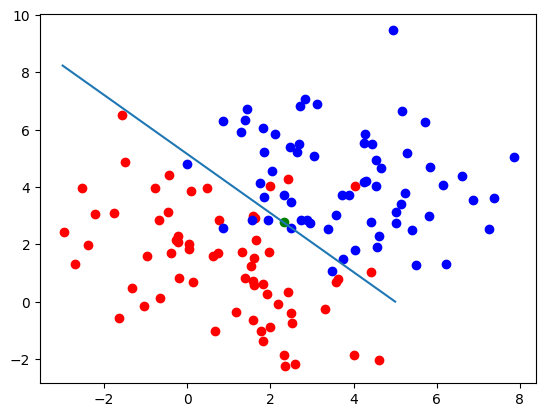

In [22]:
# arguments to plot
x = np.linspace(-3, 5, 100)
y = linear_function(x)
plt.plot(group_adam[:, 0], group_adam[:, 1], 'ro')
plt.plot(group_eve[:, 0], group_eve[:, 1], 'bo')
plt.plot(midpoint[0], midpoint[1], 'go')
plt.plot(x, y)
plt.show()

In [23]:
# use linear regression classifier to find the decision boundary between adam and eve groups
from sklearn.linear_model import LinearRegression
linear_classifier = LinearRegression()
linear_classifier.fit(np.concatenate((group_adam, group_eve)), np.concatenate((adam_group_class, eve_group_class)))

LinearRegression()

In [24]:
# find linear boundary
w = linear_classifier.coef_
v = linear_classifier.intercept_
linear_boundary = lambda x: -w[0]/w[1] * x - v/ w[1]

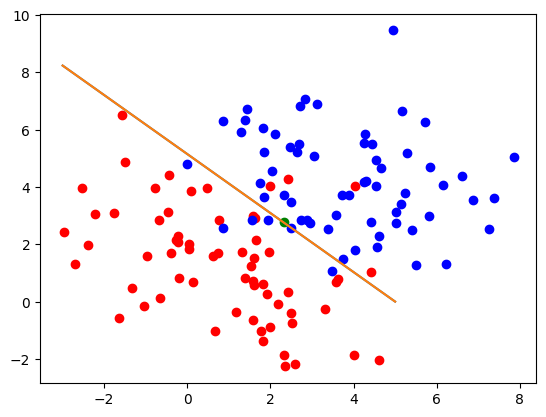

In [25]:
x = np.linspace(-3, 5, 100)
y = linear_function(x)
plt.plot(group_adam[:, 0], group_adam[:, 1], 'ro')
plt.plot(group_eve[:, 0], group_eve[:, 1], 'bo')

plt.plot(midpoint[0], midpoint[1], 'go')
plt.plot(x, y)
plt.plot(x, linear_boundary(x))
plt.show()

# The home made linear discriminant classifier is a-ok compared to the one used in sckitlearn which is cool

In [26]:
from lda_fisher import LDAFisherClassifier

In [27]:
ldaf = LDAFisherClassifier(group_adam, group_eve)

In [28]:
ldaf.fit()
slope, intercept = ldaf.linear_params()

In [29]:
slope, intercept

(-1.029005042967045, 5.15060704920368)

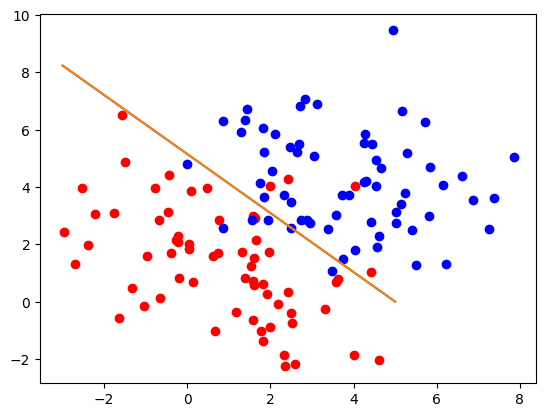

In [31]:
plt.plot(group_adam[:, 0], group_adam[:, 1], 'ro')
plt.plot(group_eve[:, 0], group_eve[:, 1], 'bo')
plt.plot(x, y)
plt.plot(x, slope * x + intercept)
plt.show()

# compare the two classifiers

In [39]:
import numpy as np
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define your custom LDA Fisher Classifier

# Generate synthetic data
np.random.seed(0)
size = 10000000
class1 = np.random.randn(size, 2) + np.array([2, 2])  # Increased dataset size for better timing analysis
class2 = np.random.randn(size, 2) + np.array([5, 5])

# Initialize classifiers
custom_lda = LDAFisherClassifier(class1, class2)
lda_sklearn = LinearDiscriminantAnalysis()

# Timing Custom LDA
start_time = time.time()
custom_lda.fit()
custom_time = time.time() - start_time

# Timing Scikit-Learn LDA
X = np.vstack([class1, class2])
y = np.array([0]*size + [1]*size)
start_time = time.time()
lda_sklearn.fit(X, y)
sklearn_time = time.time() - start_time

# Print out the comparison results
print(f"Custom LDA fit time: {custom_time:.6f} seconds")
print(f"Scikit-Learn LDA fit time: {sklearn_time:.6f} seconds")


Custom LDA fit time: 0.665461 seconds
Scikit-Learn LDA fit time: 4.539217 seconds


In [40]:
import cProfile
import pstats

# Example of profiling Scikit-Learn's LDA
profiler = cProfile.Profile()
profiler.enable()
lda_sklearn.fit(X, y)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('cumtime')
stats.print_stats()

         1119 function calls in 4.825 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    4.824    2.412 c:\Users\matip\miniconda3\envs\perceptron\lib\site-packages\IPython\core\interactiveshell.py:3514(run_code)
        2    0.000    0.000    4.824    2.412 {built-in method builtins.exec}
        1    0.000    0.000    4.824    4.824 C:\Users\matip\AppData\Local\Temp\ipykernel_18312\3896491941.py:7(<module>)
        1    0.000    0.000    4.824    4.824 c:\Users\matip\miniconda3\envs\perceptron\lib\site-packages\sklearn\base.py:1457(wrapper)
        1    0.046    0.046    4.824    4.824 c:\Users\matip\miniconda3\envs\perceptron\lib\site-packages\sklearn\discriminant_analysis.py:553(fit)
        1    0.863    0.863    3.743    3.743 c:\Users\matip\miniconda3\envs\perceptron\lib\site-packages\sklearn\discriminant_analysis.py:479(_solve_svd)
        5    0.040    0.008    1.703    0.341 c:\Users\m

In [42]:
profiler = cProfile.Profile()
profiler.enable()
custom_lda.fit()
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('cumtime')
stats.print_stats()

         196 function calls in 0.719 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.719    0.359 c:\Users\matip\miniconda3\envs\perceptron\lib\site-packages\IPython\core\interactiveshell.py:3514(run_code)
        2    0.000    0.000    0.719    0.359 {built-in method builtins.exec}
        1    0.000    0.000    0.719    0.719 C:\Users\matip\AppData\Local\Temp\ipykernel_18312\1974937861.py:3(<module>)
        1    0.015    0.015    0.719    0.719 c:\dev\Perceptron\lda_fisher.py:13(fit)
        2    0.203    0.101    0.483    0.241 c:\Users\matip\miniconda3\envs\perceptron\lib\site-packages\numpy\lib\function_base.py:2530(cov)
        4    0.000    0.000    0.414    0.103 c:\Users\matip\miniconda3\envs\perceptron\lib\site-packages\numpy\core\_methods.py:101(_mean)
        4    0.413    0.103    0.413    0.103 {method 'reduce' of 'numpy.ufunc' objects}
        2    0.000    0.000    0.221  